# Dacon cup 추가 데이터 변수 EDA
- 추가 데이터 변수 설명 : [링크](https://dacon.io/competitions/official/235683/talkboard/402155?page=1&dtype=recent&ptype=pub)

## Data Load

In [119]:
import pandas as pd
import warnings
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.offline as pyo
import plotly.io as pio
import matplotlib.pyplot as plt
pio.renderers.default = 'notebook_connected'

warnings.filterwarnings(action='ignore')

In [64]:
login_info = pd.read_csv('info_login.csv', index_col=0)
competition_info = pd.read_csv('info_competition.csv', index_col=0, encoding='cp949')
user_info = pd.read_csv('info_user.csv', index_col=0)
submission_info = pd.read_csv('info_submission.csv', index_col=0)

## User 가입 정보

In [65]:
user_info.head()

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0.0,15994.0,2017-05-02 23:58,94.0,306.0,477.0,82.0,1.0,1.0
1.0,19195.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2.0,16339.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3.0,7290.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4.0,21287.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0


In [66]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 22103 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21692 non-null  float64
 1   c_time                   21692 non-null  object 
 2   entered_competition_cnt  21692 non-null  float64
 3   code_share_cnt           21692 non-null  float64
 4   talk_board_cnt           21692 non-null  float64
 5   country_code             21692 non-null  float64
 6   python_level             21692 non-null  float64
 7   ds_level                 21692 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.5+ MB


22103개 중 411개(1.8%)의 결측치 존재.  

In [67]:
user_info.describe()

,id,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
count,21692.000000,21692.000000,21692.000000,21692.000000,21692.000000,21692.000000,21692.000000
mean,11055.887055,1.715748,0.066661,0.095796,81.928729,0.994652,0.993454
std,6384.651761,2.912532,2.513415,3.916602,20.724577,0.082986,0.087236
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5526.750000,0.000000,0.000000,0.000000,82.000000,1.000000,1.000000
50%,11045.500000,1.000000,0.000000,0.000000,82.000000,1.000000,1.000000
75%,16593.250000,2.000000,0.000000,0.000000,82.000000,1.000000,1.000000
max,22102.000000,94.000000,306.000000,477.000000,998.000000,2.000000,2.000000


- 결측치 제거 : user_info의 결측치를 그냥 제거해도되나? info_login과 info_submission의 user_id의 결측치는 탈퇴한 유저라 나와있는데 user_info의 결측치에 대해서는 언급이 없다.

In [68]:
# user_info_drop_na에 결측치를 제거한 데이터프레임을 복사시킨다.
user_info_drop_na = user_info.dropna().copy()

In [69]:
# c_time을 시간 데이터타입으로 변경해준다.
user_info_drop_na['c_time'] = pd.to_datetime(user_info_drop_na['c_time'])

In [70]:
# 4자리 연도로 year 컬럼을 str형식으로 생성한다,
user_info_drop_na['year'] = user_info_drop_na['c_time'].apply(lambda x : x.strftime('%Y') )

In [71]:
user_info_drop_na['year']

0.0        2017
1.0        2018
2.0        2018
3.0        2018
4.0        2018
           ... 
21687.0    2020
21688.0    2020
21689.0    2020
21690.0    2020
21691.0    2020
Name: year, Length: 21692, dtype: object

### Year New User
- 2020년에 가장 많이 가입한 것을 확인할 수 있었음.
- why? 데이터분석에대한 관심도 증가? 대회수 증가? 


In [72]:
# 년도와 아이디를 기준으로 그룹지어 year의 갯수를 정렬
monthly_new_user = user_info_drop_na[['year', 'id']].groupby(['year']).count() ;monthly_new_user

,id
year,
2017,1
2018,1317
2019,5482
2020,14892


In [73]:
# x축을 인덱스, y축을 값으로 하는 plot data 리스트 생성
plot_data = [
    go.Scatter(
        x=monthly_new_user.index,
        y=monthly_new_user.id,
    )
]

In [74]:
# 그래프 x축의 이름, y축의 이름 제목 등을 지정
plot_layout = go.Layout(
    xaxis = {
        'type': 'category',
        'title' : 'Year',
    },
    yaxis = {
        'title' : 'New user count'
    },
    title = 'Year New User',
)

In [75]:
# 그래프 그리기
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### Monthly New User
- 2020년 7월과 11월에 갑자기 많은 사용자가 가입한 것을 확인할 수 있었다.
- 왜 가입을 많이했는지 파악 필요.
- 대회의 수 증가? 아니면, 금액증가, 또는 단체 가입자 유입요인이 있었는지?

In [76]:
# 년, 월을 표시한다.
user_info_drop_na['year_month'] = user_info_drop_na['c_time'].apply(lambda x : x.strftime('%Y-%m') ) ;user_info_drop_na['year_month']

0.0        2017-05
1.0        2018-08
2.0        2018-08
3.0        2018-08
4.0        2018-08
            ...   
21687.0    2020-12
21688.0    2020-12
21689.0    2020-12
21690.0    2020-12
21691.0    2020-12
Name: year_month, Length: 21692, dtype: object

In [77]:
# 년,월과 아이디로 그룹지어 월 갯수로 정렬
monthly_new_user = user_info_drop_na[['year_month', 'id']].groupby(['year_month']).count() ;monthly_new_user

,id
year_month,
2017-05,1
2018-08,384
2018-09,187
2018-10,135
2018-11,362
2018-12,249
2019-01,276
2019-02,661
2019-03,233


In [78]:
# 위와 동일하게 데이터, 그래프 축 설정 후 그래프를 그린다.
plot_data = [
    go.Scatter(
        x=monthly_new_user.index,
        y=monthly_new_user.id,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'category',
        'title' : 'Year-Month'
    },
    yaxis = {
        'title' : 'New user Count'
    },
    title = 'Monthly New User',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### Weekday New User
- 월,화요일에 신규 가입자가 많은 것을 확인할 수 있다.
- 주말의 경우 급격히 신규가입자가 감소한다.
- 주말에는 놀다가 월요일부터 새로운 마음으로 데이터 대회를 찾는 학생들?

In [79]:
# 요일 컬럼을 만들고 요일별, 아이디별로 그룹지어 요일의 갯수로 정렬한다.
week_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
user_info_drop_na['week_day'] = user_info_drop_na['c_time'].apply(lambda x : x.weekday())
week_day_new_user = user_info_drop_na[['week_day', 'id']].groupby('week_day').count()

In [80]:
# 위와 동일하게 데이터, 그래프 축 정의하여 그래프를 그린다.
plot_data = [
    go.Scatter(
        x=list(map(lambda x : week_day[x], week_day_new_user.index.tolist())),
        y=week_day_new_user.id,
    )
    
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'category',
        'title' : 'Weekday'
    },
    yaxis = {
        'title' : 'New user Count'
    },
    title = 'Weekday New User',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### Weekday & Hour New User
- 월요일에 가장 많이 가입을 하고 대부분 요일 13 ~ 17시 사이에 회원가입을 많이 하는 것을 알 수 있다.
- 2 ~ 7시에는 가입자가 드문 것을 확인할 수 있다.

In [81]:
# 시간컬럼을 만들어준다
user_info_drop_na['hour'] = user_info_drop_na.c_time.apply(lambda x : x.hour)

In [82]:
# 요일과 시간 아이디를 요일과 시간으로 그룹지어 갯수를 센다음, 시간을 기준으로 피벗테이블을 만든다
weekly_hour_join_history = user_info_drop_na[['week_day', 'hour', 'id']].groupby(['week_day', 'hour']).count().reset_index().pivot_table(index='hour', columns='week_day')

In [83]:
weekly_hour_join_history

id                              
week_day    0    1    2    3    4    5    6
hour                                       
0          89  106   98   98  135   89   77
1          55   66   66   66   58   75   66
2          32   26   25   45   36   35   33
3          25   20   25   21   24   38   23
4          10   14   19   14   10   22   16
5          10    9   10    9   16   13    5
6          10   12   11   12   18    8    2
7          18   20   24   20   16   15   12
8          65   59   49   38   58   26   26
9         154  189  118  149  144   67   38
10        179  209  191  261  210   75   58
11        243  236  180  181  197   87   47
12        171  157  164  142  175   96   86
13        248  268  215  220  240  143  113
14        293  299  238  270  297  143  134
15        341  310  319  275  331  189  180
16        320  326  277  263  299  178  160
17        301  298  254  237  384  163  121
18        235  193  179  179  187   91  106
19        212  211  195  154  156  101  115
20        219  199  181  192  155  100  152
21        190  171  176  177  115   97  166
22        177  170  175  140  120  116  158
23        147  167  154  132  106   96  131

In [84]:
# 컬럼명을 요일명으로 바꾸어준다.
weekly_hour_join_history.columns = [week_day[i] for i in range(len(weekly_hour_join_history.columns))]

In [85]:
# 가입자가 많은 시간대를 진하게 표시
weekly_hour_join_history.style.background_gradient(cmap='coolwarm')

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
0,89,106,98,98,135,89,77
1,55,66,66,66,58,75,66
2,32,26,25,45,36,35,33
3,25,20,25,21,24,38,23
4,10,14,19,14,10,22,16
5,10,9,10,9,16,13,5
6,10,12,11,12,18,8,2
7,18,20,24,20,16,15,12
8,65,59,49,38,58,26,26


### Hourly New User
- 위에서 확인한 바와 유사하게 전체적으로도 13~17시 사이에 가입자가 가장 많은 것을 확인할 수 있다.

In [86]:
hour_new_userdist = weekly_hour_join_history.sum(axis=1)


plot_data = [
    go.Scatter(
        x=hour_new_userdist.index,
        y=hour_new_userdist.values,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'linear',
        'title' : 'Hour'
    },
    yaxis = {
        'title' : 'New user Count'
    },
    title = 'Hour New User',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

* 2020년 증가, 7월 11월 증가, 주말 감소, 주초 증가, 13~17시 시간대 유입량 최대 이유 분석필요

### Most user join day
- 2020년 7월에 새로운 사용자가 가장 많이 들어왔다는 것을 확인할 수 있었는데, 특히 7월 30 ~ 31일에 급격하게 많이 들어온 것을 확인할 수 있다.
- 이 날 무슨 이벤트가 있거나, 특별한 경진대회가 열렸는지 확인 필요

In [87]:
user_info_drop_na['day'] = user_info_drop_na.c_time.apply(lambda x : x.strftime('%Y-%m-%d'))
daily_join_user_cnt = user_info_drop_na[['day', 'id']].groupby('day').count()
daily_join_user_cnt.sort_values('id', ascending=False).head(10)

,id
day,
2020-07-31,454
2020-07-30,206
2020-09-01,199
2020-07-27,188
2020-11-09,162
2020-09-04,161
2020-07-28,153
2020-09-02,130
2019-11-01,127


### competition 정보를 가져와서, 대회가 사용자유입에 영향을 주었는지 확인

In [88]:
# 결측치는 당연히 없다
competition_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 109
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cpt_id            48 non-null     int64 
 1   is_official       48 non-null     int64 
 2   period_start      48 non-null     object
 3   period_end        48 non-null     object
 4   name              48 non-null     object
 5   name_eng          25 non-null     object
 6   keyword           48 non-null     object
 7   keyword_eng       24 non-null     object
 8   participants      48 non-null     int64 
 9   max_team_member   48 non-null     int64 
 10  max_file_per_day  48 non-null     int64 
 11  prize             48 non-null     int64 
 12  prize_info        32 non-null     object
 13  merge_deadline    48 non-null     object
 14  winner_show       48 non-null     int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ KB


In [89]:
competition_info_re = competition_info.copy()

In [90]:
competition_info_re

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,136,1,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13 23:59,3
1,9565,1,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13 23:59,3
2,17801,1,2018-10-18 0:00,2018-12-31 23:59,아파트 경매가격 예측 경진대회,Apartment Auction Price Forecast,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,[Finance] Real Estate Apartment Auction Big Da...,316,10,3,1000,"$10,000 + 120,000ZPR",2018-12-31 23:59,3
3,21265,1,2018-11-13 0:00,2019-01-31 23:59,아파트 실거래가 예측,apartment real price forecast,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,[Finance] Predictive analysis of real transact...,568,10,3,800,"$8,000 + 80,000ZPR",2019-01-31 23:59,3
4,42473,1,2018-12-25 0:00,2019-01-10 23:59,신용카드 거래 데이터 시각화,credit card transaction data visualization,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...","[Finance] Credit cards, time series, visualiza...",252,5,3,100,"$1,000 + 100,000ZPR",2019-01-10 23:59,3
5,62540,1,2019-02-08 0:00,2019-07-18 23:59,KBO 타자 OPS 예측 경진대회,KBO batter OPS modeling,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",[Sports] KBO hitter big data and AI predict OP...,341,5,3,800,800만원,2019-07-18 23:59,3
6,68346,1,2019-03-26 0:00,2019-05-20 23:59,KBO 외국인 투수 스카우팅 최적화 경진대회,KBO foreign pitcher scouting optimization,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",[Sports] Pitcher Scout Analysis using MLB data...,98,1,3,200,200만원,2019-05-20 23:59,3
7,82407,1,2019-05-06 0:00,2019-07-08 23:59,KCB 금융스타일 시각화 경진대회,KCB Financial Style Visualization Contest,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",Finance | Job offer | Analysis visualization w...,269,5,3,1000,"1,000만원",2019-07-08 23:59,3
8,140472,1,2019-07-11 0:00,2019-10-21 23:59,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",624,5,100,200,200만원,2020-10-28 23:59,3
9,196878,1,2019-10-01 0:00,2019-10-27 23:59,전력 수요량 예측 경진대회,Electric Power Demand Forecast Contest,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",[Public] Analyzing demand by power weather big...,478,4,3,600,600만원,2019-10-27 23:59,3


In [91]:
competition_info_re['period_start'] = pd.to_datetime(competition_info_re['period_start'])
competition_info_re['period_end'] = pd.to_datetime(competition_info_re['period_end'])

In [92]:
competition_info_re['year_start'] = competition_info_re['period_start'].apply(lambda x : x.strftime('%Y')) 
competition_info_re['year_end'] = competition_info_re['period_end'].apply(lambda x : x.strftime('%Y')) 

In [93]:
competition_info_re['month_start'] = competition_info_re['period_start'].apply(lambda x : x.strftime('%m')) 
competition_info_re['month_end'] = competition_info_re['period_end'].apply(lambda x : x.strftime('%m')) 

* 2020년에 대회갯수가 월등히 3배 이상 증가하였다. 따라서 가입자수로 늘었다고 예측해볼수있다

In [94]:
competition_info_re['year_start'].value_counts()

2020    33
2019    10
2018     5
Name: year_start, dtype: int64

* 유입량이 많았던 7월은 대회갯수가 많지 않고 11월에만 많다.

In [95]:
competition_info_re['month_start'].value_counts()

11    11
10     7
03     4
06     4
09     4
05     3
02     3
12     3
07     3
08     3
01     2
04     1
Name: month_start, dtype: int64

* 12월에 끝나는 대회가 가장많고(11월에 대회가 많았기에 그렇다고 예측) 7월에 종료되는 대회도 많다.
- 7월에 종료되는 대회가 많아서 유입량이 두번째로 많은것인가?

In [96]:
competition_info_re['month_end'].value_counts()

12    10
11     6
07     6
10     5
05     4
01     4
09     4
02     3
06     2
04     2
03     1
08     1
Name: month_end, dtype: int64

* 평균 상금액

In [97]:
competition_info_re[['month_end','prize']].groupby('month_end')['prize'].mean().reset_index().sort_values(by=['prize'],ascending=False)

,month_end,prize
10,11,1591.666667
8,09,1012.500000
11,12,930.000000
0,01,875.000000
6,07,633.333333
9,10,630.000000
5,06,480.000000
1,02,412.333333
4,05,237.500000
3,04,175.000000


In [98]:
f = competition_info_re[['month_end','prize']].sort_values(by=['prize']) ;f

,month_end,prize
19,03,0
40,02,83
50,04,100
76,09,100
109,12,100
87,11,100
99,12,100
106,12,100
4,01,100
72,08,103


In [99]:
f.describe()

,prize
count,48.000000
mean,769.791667
std,859.546044
min,0.000000
25%,200.000000
50%,600.000000
75%,1000.000000
max,4850.000000


In [100]:
Q1 = f.prize.quantile(.25)
Q2 = f.prize.quantile(.50)
Q3 = f.prize.quantile(.75)

In [101]:
def udf(x) :
    if x < Q1:
        return '하'
    elif x < Q2 :
        return '중'
    else:
        return '상'

In [102]:
f['prize_ud'] = f['prize'].map(udf)

In [103]:
f.head()

,month_end,prize,prize_ud
19,03,0,하
40,02,83,하
50,04,100,하
76,09,100,하
109,12,100,하


* 가입자 유입량이 최고점이었던 7월과 11월에 마감되는 대회중 상금이 큰 대회가 많다
* 마감되는 달의 대회의 상금이 가입자 수에 영향을 줄 것으로 예상된다

In [104]:
f[['month_end', 'prize_ud']].groupby(['month_end','prize_ud'])['prize_ud'].count()

month_end  prize_ud
01         상           3
           하           1
02         상           1
           하           2
03         하           1
04         중           1
           하           1
05         중           4
06         상           1
           중           1
07         상           5
           중           1
08         하           1
09         상           3
           하           1
10         상           3
           중           2
11         상           5
           하           1
12         상           6
           중           1
           하           3
Name: prize_ud, dtype: int64

* 시작날짜와 팀 병합날짜의 차이

In [105]:
competition_info_re['period_start'] = pd.to_datetime(competition_info_re['period_start'])
competition_info_re['merge_deadline'] = pd.to_datetime(competition_info_re['merge_deadline'])

In [106]:
competition_info_re['sub'] = competition_info_re['period_start'] - competition_info_re['merge_deadline']

In [107]:
competition_info_re

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show,year_start,year_end,month_start,month_end,sub
0,136,1,2018-08-14 00:00:00,2018-09-13 23:59:00,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13 23:59:00,3,2018,2018,08,09,-31 days +00:01:00
1,9565,1,2018-09-15 00:00:00,2018-10-13 23:59:00,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13 23:59:00,3,2018,2018,09,10,-29 days +00:01:00
2,17801,1,2018-10-18 00:00:00,2018-12-31 23:59:00,아파트 경매가격 예측 경진대회,Apartment Auction Price Forecast,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,[Finance] Real Estate Apartment Auction Big Da...,316,10,3,1000,"$10,000 + 120,000ZPR",2018-12-31 23:59:00,3,2018,2018,10,12,-75 days +00:01:00
3,21265,1,2018-11-13 00:00:00,2019-01-31 23:59:00,아파트 실거래가 예측,apartment real price forecast,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,[Finance] Predictive analysis of real transact...,568,10,3,800,"$8,000 + 80,000ZPR",2019-01-31 23:59:00,3,2018,2019,11,01,-80 days +00:01:00
4,42473,1,2018-12-25 00:00:00,2019-01-10 23:59:00,신용카드 거래 데이터 시각화,credit card transaction data visualization,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...","[Finance] Credit cards, time series, visualiza...",252,5,3,100,"$1,000 + 100,000ZPR",2019-01-10 23:59:00,3,2018,2019,12,01,-17 days +00:01:00
5,62540,1,2019-02-08 00:00:00,2019-07-18 23:59:00,KBO 타자 OPS 예측 경진대회,KBO batter OPS modeling,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",[Sports] KBO hitter big data and AI predict OP...,341,5,3,800,800만원,2019-07-18 23:59:00,3,2019,2019,02,07,-161 days +00:01:00
6,68346,1,2019-03-26 00:00:00,2019-05-20 23:59:00,KBO 외국인 투수 스카우팅 최적화 경진대회,KBO foreign pitcher scouting optimization,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",[Sports] Pitcher Scout Analysis using MLB data...,98,1,3,200,200만원,2019-05-20 23:59:00,3,2019,2019,03,05,-56 days +00:01:00
7,82407,1,2019-05-06 00:00:00,2019-07-08 23:59:00,KCB 금융스타일 시각화 경진대회,KCB Financial Style Visualization Contest,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",Finance | Job offer | Analysis visualization w...,269,5,3,1000,"1,000만원",2019-07-08 23:59:00,3,2019,2019,05,07,-64 days +00:01:00
8,140472,1,2019-07-11 00:00:00,2019-10-21 23:59:00,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",624,5,100,200,200만원,2020-10-28 23:59:00,3,2019,2019,07,10,-476 days +00:01:00
9,196878,1,2019-10-01 00:00:00,2019-10-27 23:59:00,전력 수요량 예측 경진대회,Electric Power Demand Forecast Contest,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",[Public] Analyzing demand by power weather big...,478,4,3,600,600만원,2019-10-27 23:59:00,3,2019,2019,10,10,-27 days +00:01:00


In [110]:
competition_info_re['sub'] = competition_info_re['sub'].dt.days.astype('int')*(-1)

* 2, 7, 11월이 평균적으로 팁 병합기간이 길었다.

In [116]:
f = competition_info_re.groupby('month_start')['sub'].mean().reset_index() ;f

,month_start,sub
0,01,30.000000
1,02,118.333333
2,03,38.000000
3,04,36.000000
4,05,35.666667
5,06,25.500000
6,07,183.000000
7,08,29.666667
8,09,29.250000
9,10,32.428571


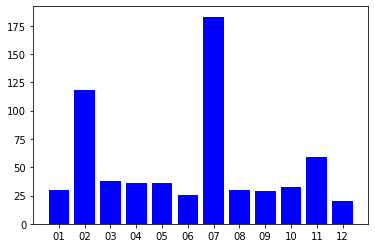

In [120]:
plt.bar(f['month_start'], f['sub'], color='blue')
plt.show()

### Competition Count per user
- 대부분의 사용자는 6개 이하의 경진대회를 참여한 것을 확인할 수 있다.
- 94개나 참여한 사용자가 존재한다.(열린 경진대회 총 수 확인 필요)

In [121]:
import numpy as np
user_info_drop_na.entered_competition_cnt = user_info_drop_na.entered_competition_cnt.astype(np.int32)
plot_data = [
    go.Box(
        x=user_info_drop_na.entered_competition_cnt,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'linear',
        'title' : 'Enter Count'
    },
    title = 'Entered competition count Box Plot',
)

fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### Code shared per user
- 대다수의 사용자는 자신의 코드를 공유하지 않는 것으로 보인다.
- 코드 공유를 활성화 할 수 있는 방법이 필요해 보인다.

In [122]:
user_info_drop_na.code_share_cnt = user_info_drop_na.code_share_cnt.astype(np.int32)
plot_data = [
    go.Box(
        x=user_info_drop_na.code_share_cnt,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'linear',
        'title' : 'Codes shared Count'
    },
    title = 'Codes shared count Box Plot',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

In [123]:
quantile_ls = [0.5, 0.9, 0.95, 0.99]
for quantile in quantile_ls:
    rs = user_info_drop_na.code_share_cnt.quantile(quantile)
    print(f'Quantile {quantile} >> {rs}')

Quantile 0.5 >> 0.0
Quantile 0.9 >> 0.0
Quantile 0.95 >> 0.0
Quantile 0.99 >> 1.0


### Talk board per user
- 대다수의 사용자는 토론을 이용하지 않는 것으로 보인다.
- 왜 이용하지 않는지 파악하고 토론을 권장할 방법이 필요해 보임.

In [124]:
user_info_drop_na.talk_board_cnt = user_info_drop_na.talk_board_cnt.astype(np.int32)
plot_data = [
    go.Box(
        x=user_info_drop_na.talk_board_cnt,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'title' : 'Talk board Count'
    },
    title = 'Talk board count Box Plot',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

In [125]:
quantile_ls = [0.5, 0.9, 0.95, 0.99]
for quantile in quantile_ls:
    rs = user_info_drop_na.talk_board_cnt.quantile(quantile)
    print(f'Quantile {quantile} >> {rs}')

Quantile 0.5 >> 0.0
Quantile 0.9 >> 0.0
Quantile 0.95 >> 0.0
Quantile 0.99 >> 2.0


### New User Country distribution
- 역시 한국 서비스라서 그런지 locale 82가 가장 많다는 것을 확인할 수 있었다.
- 종종 locale 1 (USA) 사용자가 보이기도 한다.

In [126]:
country_code_dist = user_info_drop_na.country_code.value_counts()
country_code_label = list(map(lambda x : f'country_code : {int(x)}', country_code_dist.index))
country_code_counts = country_code_dist.values

plot_data = [
    go.Pie(
        labels = country_code_label,
        values= country_code_counts,
        hole=.3
    )
]
plot_layout = go.Layout(
    title = 'Country code Pie chart',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
pyo.iplot(fig)

### Python level dist
- 대다수의 가입자의 python level은 1인 것을 확인할 수 있다.
- python level은 어떻게 주어지는 것일까?
- 자기 자신이 잘한다고 생각하는 사람 거의 없음. 이건 딱히 분석에 반영할 필요가있을까?

In [127]:
python_level_dist = user_info_drop_na.python_level.value_counts()
python_level_label = list(map(lambda x : f'python_level : lv {int(x)}', python_level_dist.index))
python_level_counts = python_level_dist.values

plot_data = [
    go.Pie(
        labels = python_level_label,
        values= python_level_counts,
        hole=.3
    )
]
plot_layout = go.Layout(
    title = 'Python level Pie chart',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
pyo.iplot(fig)

### Data Science level dist
- 위의 python level과 유사하게 대부분 ds_level이 1인 경우가 가장 많았다.(거의 대부분)
- DS level을 상승할 수 있는 방법은 무엇일까?

In [128]:
ds_level_dist = user_info_drop_na.ds_level.value_counts()
ds_level_label = list(map(lambda x : f'ds_level : lv {int(x)}', ds_level_dist.index))
ds_level_counts = ds_level_dist.values

plot_data = [
    go.Pie(
        labels = ds_level_label,
        values= ds_level_counts,
        hole=.5
    )
]
plot_layout = go.Layout(
    title = 'DS level Pie chart',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
pyo.iplot(fig)

## 경진대회 정보

In [129]:
competition_info.head()

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,136,1,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13 23:59,3
1,9565,1,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13 23:59,3
2,17801,1,2018-10-18 0:00,2018-12-31 23:59,아파트 경매가격 예측 경진대회,Apartment Auction Price Forecast,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,[Finance] Real Estate Apartment Auction Big Da...,316,10,3,1000,"$10,000 + 120,000ZPR",2018-12-31 23:59,3
3,21265,1,2018-11-13 0:00,2019-01-31 23:59,아파트 실거래가 예측,apartment real price forecast,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,[Finance] Predictive analysis of real transact...,568,10,3,800,"$8,000 + 80,000ZPR",2019-01-31 23:59,3
4,42473,1,2018-12-25 0:00,2019-01-10 23:59,신용카드 거래 데이터 시각화,credit card transaction data visualization,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...","[Finance] Credit cards, time series, visualiza...",252,5,3,100,"$1,000 + 100,000ZPR",2019-01-10 23:59,3


데이터 전처리

In [131]:
competition_info.period_start = pd.to_datetime(competition_info.period_start)
competition_info.period_end = pd.to_datetime(competition_info.period_end)
competition_info.merge_deadline = pd.to_datetime(competition_info.merge_deadline)

### 참여자 수가 많은 경진대회
- 코로나 관련 경진대회가 참여자가 가장 많은 것을 확인할 수 있다.

In [132]:
competition_info[['name', 'keyword', 'period_start', 'participants', 'max_team_member', 'prize']].sort_values('participants', ascending=False).head(10)

,name,keyword,period_start,participants,max_team_member,prize
73,포스트 코로나 데이터 시각화 경진대회,KT | 유동인구 | 소비 | 포스트 코로나 | 투표 및 심사 평가,2020-07-01 10:00:00,1983,5,600
53,코로나 데이터 시각화 AI 경진대회,월간 데이콘 4 | 의료 | 마이크로소프트 | 코로나 빅데이터를 AI로 시각화 |...,2020-03-29 00:00:00,1751,5,250
71,제주 신용카드 빅데이터 경진대회,금융 | 제주테크노파크 | 공공데이터 AI 활용 카드 사용량 예측 | RMSLE,2020-06-22 10:00:00,1538,5,600
87,심리 성향 예측 AI 경진대회,월간 데이콘 8 | 심리 테스트 분석 | AUC | 분류,2020-09-28 00:00:00,1260,3,100
51,공공 데이터 활용 온도 추정 AI 경진대회,AI프렌즈 시즌1 | 기상 | 한국기계연구원 | 지역별 Small 공공 데이터와 ...,2020-03-01 00:00:00,1177,5,250
39,원자력발전소 상태 판단 경진대회,"산업 | 한국수력원자력 | 발전소 빅데이터, AI 활용 발전소 상태 분류 | Log...",2020-01-16 00:00:00,1144,5,1000
74,국토교통 빅데이터 온라인 해커톤 경진대회,국토교통부 | 빅데이터 | 포스트코로나 | 시각화 | 투표 및 심사평가,2020-07-14 10:00:00,957,5,1100
76,컴퓨터 비전 학습 경진대회,월간 데이콘 7 | 글자에 숨겨진 숫자 이미지 예측 | MNIST | Accura...,2020-08-03 10:00:00,945,3,100
18,금융 문자 분석 경진대회,금융 | KB금융그룹 | 금융 Mobile 문자 빅데이터와 AI로 스팸을 분류 | ...,2019-11-21 00:00:00,936,5,2000
75,산업제어시스템 보안위협 탐지 AI 경진대회,산업 | 국가보안기술연구소 | 인공지능 AI 활용 위협 탐지 알고리즘 | TaPR ...,2020-08-17 10:00:00,916,5,2000


### 월별 경진대회 시작 개수
- 2020년 11월에 가장 많은 경진대회가 열린 것을 확인할 수 있다.
- 2020년 7월에 신규가입자가 많았으나 실제로 열린 경진대회 수는 많지 않은 것을 볼 수 있다.

In [133]:
competition_info['year_month'] = competition_info.period_start.apply(lambda x : x.strftime('%Y-%m'))

monthly_competition_cnt = competition_info[['year_month', 'cpt_id']].groupby(['year_month']).count()

plot_data = [
    go.Scatter(
        x=monthly_competition_cnt.index,
        y=monthly_competition_cnt.cpt_id,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'category',
        'title' : 'Year-Month'
    },
    yaxis = {
        'title' : 'New Competition start count'
    },
    title = 'Monthly New Competition start',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### 경진대회 간트차트
- 7월 30~31일에 근처에 진행 중인 경진대회를 확인하면 아래와 같다.
    - 꿈꾸는 아이(AI) 전력 수요량 예측 경진대회
    - AI야 , 진짜 뉴스를 찾아줘! AI 경진대회
    - 2020 포스트 코로나 데이터 시각화 경진대회(31일 마감)
    - 2020, 제주 신용카드 빅데이터 경진대회(31일 마감)
    - 컴퓨터 비전 학습 경진대회(8월 3일 시작)
- 이 중에 신규가입자에 영향을 준 경진대회가 있을까?

In [134]:
import plotly.figure_factory as ff

In [135]:
data = []
for i, row in competition_info.iterrows():
    data.append({
        'Task' : row['name'],
        'Start' : row['period_start'].strftime('%Y-%m-%d'),
        'Finish' : row['period_end'].strftime('%Y-%m-%d'),
    })

fig = ff.create_gantt(data, show_colorbar=True, title='Competition Gantt chart')
fig.show()

### 키워드 순위
- 지금까지 열린 경진대회에서 금융이라는 키워드가 가장 많은 것을 확인할 수 있다.

In [136]:
from collections import Counter
key_word_list = []

for key_word_ls_i in competition_info['keyword'].apply(lambda x : list(map(lambda y: y.strip(), x.split('|')))):
    key_word_list += key_word_ls_i
key_word_counter = Counter(key_word_list)

In [137]:
key_word_counter.most_common(10)

[('금융', 11),
 ('산업', 6),
 ('RMSE', 5),
 ('시계열, 회귀', 4),
 ('시각화', 4),
 ('분류', 3),
 ('Accuracy', 3),
 ('회귀', 3),
 ('스포츠', 3),
 ('MAE', 3)]

### 상금과 참여자 수와의 상관성
- 상금이 높을 수록 참여자가 많을 것이라고 생각을 했다.
- 하지만 결과적으로는 상관성이 있다고 볼 수 없었다.
    - 어떻게 보면 상금이 높을 수록 참여자가 줄어드는 것 처럼 보인다.

In [138]:

plot_data = [
    go.Scatter(
        x=competition_info['prize'],
        y=competition_info['participants'],
        mode='markers',
    )
]
plot_layout = go.Layout(
    xaxis = {
        'title' : 'Prize'
    },
    yaxis = {
        'title' : 'Participants count'
    },
    title = 'Correlation of Prize & Participants count',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

In [139]:
competition_info['prize'].corr(competition_info['participants'])

-0.20896389075072497

### 상금 분포
- 상금은 거의 2000만원 이하인 것을 확인할 수 있다.(단위는 만원이 아닐 수도 있음)

In [140]:

plot_data = [
    go.Box(
        x=competition_info['prize'],
    )
]
plot_layout = go.Layout(
    xaxis = {
        'title' : 'Prize'
    },
    title = 'Competition Prize Box Plot',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### 참여자 수 분포
- 모든 경진 대회에서 2000명 미만의 참여자 수를 보여줬으며, 대부분(75% 이상)1000명 미만 인 것을 확인할 수 있다.

In [141]:

plot_data = [
    go.Box(
        x=competition_info['participants'],
    )
]
plot_layout = go.Layout(
    xaxis = {
        'title' : 'participants'
    },
    title = 'Competition participants Box Plot',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

## User 로그인 정보

data load 및 전처리

In [142]:
login_info_drop_na = login_info.dropna().copy()

In [143]:
login_info_drop_na.head()

,login_id,user_id,c_time,platform,browser
0.0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1.0,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2.0,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
5.0,14280.0,10206.0,2018-09-23 13:24,Windows,Chrome 68.0.3440.106
6.0,14288.0,488.0,2018-09-23 14:05,Windows 7,Chrome 68.0.3440.106


In [144]:
login_info_drop_na['c_time'] = pd.to_datetime(login_info_drop_na['c_time'])

### Login 플랫폼
- 대다수의 사용자가 윈도우로 접속하는 것을 확인할 수 있다.

In [145]:
import re
login_info_drop_na['platform_norm'] = login_info_drop_na['platform'].apply(lambda x : re.sub(r'[0-9.]','', x).strip())
platform_dist = login_info_drop_na.platform_norm.value_counts()
platform_label = platform_dist.index
platform_counts = platform_dist.values

plot_data = [
    go.Pie(
        labels = platform_label,
        values= platform_counts,
        hole=.5
    )
]
plot_layout = go.Layout(
    title = 'Login Platform Pie chart',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
pyo.iplot(fig)

### Login 브라우저
- 87%나 해당하는 사용자가 Chrome을 사용하는 것을 확인할 수 있다.
- 브라우저 호환성을 체크할때 가장 우선 순위가 높은 것은 chrome으로 보인다.

In [146]:

login_info_drop_na['browser_norm'] = login_info_drop_na['browser'].apply(lambda x : re.sub(r'[0-9.]','', x).strip())
browser_dist = login_info_drop_na.browser_norm.value_counts()
browser_label = browser_dist.index
browser_counts = browser_dist.values

plot_data = [
    go.Pie(
        labels = browser_label,
        values= browser_counts,
        hole=.5
    )
]
plot_layout = go.Layout(
    title = 'Login Browser Pie chart',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
pyo.iplot(fig)

### Monthly User
- Active user, Monthly total user는 증가하는 추세로 보인다.
- 한 사람당 평균 로그인 횟수도 증가하는 것으로 보인다.
- 2020년의 정보가 없는게 아쉽다.

In [147]:
login_info_drop_na['year_month'] = login_info_drop_na['c_time'].apply(lambda x : x.strftime('%Y-%m') )
monthly_active_user = login_info_drop_na[['year_month', 'user_id']].groupby(['year_month']).nunique()
monthly_user = login_info_drop_na[['year_month', 'user_id']].groupby(['year_month']).count()
avg_monthly_active_user = monthly_active_user.user_id.mean()
plot_data = [
    go.Scatter(
        x=monthly_active_user.index,
        y=monthly_active_user.user_id,
        name='Montly Active User(Distinct)',
        mode='lines+markers'
    ),
    go.Scatter(
        x=monthly_user.index,
        y=monthly_user.user_id,
        name='Monthly User',
    ),
]
plot_layout = go.Layout(
    shapes=[
        {
            'type':'line',
            'x0' : monthly_active_user.index.min(),
            'y0' : avg_monthly_active_user,
            'x1' : monthly_active_user.index.max(),
            'y1' : avg_monthly_active_user,
            'line' : {
                'color' : 'rgb(0,0,0)',
                'dash' : 'dot',
            },
            
        },
    ],
    xaxis = {
        'type': 'category',
        'title' : 'Year-Month'
    },
    yaxis = {
        'title' : 'User Count'
    },
    title = 'Monthly User',
)
fig = go.Figure(data=plot_data, layout = plot_layout)

pyo.iplot(fig)

### Daily User
- DAU는 증가하는 추세로 보인다.(active 기준 : 로그인)
- 가입을 했다고 해서 바로 로그인으로 찍히는 것은 아닌 것으로 보인다.

In [148]:
login_info_drop_na['day'] = login_info_drop_na['c_time'].apply(lambda x : x.strftime('%Y-%m-%d') )
daily_active_user = login_info_drop_na[['day', 'user_id']].groupby(['day']).nunique()
daily_user = login_info_drop_na[['day', 'user_id']].groupby(['day']).count()

plot_data = [
    go.Scatter(
        x=daily_active_user.index,
        y=daily_active_user.user_id,
        name='Dailly Active User(Distinct)',
        mode='lines+markers'
    ),
    go.Bar(
        x=daily_user.index,
        y=daily_user.user_id,
        name='Daily User',
    ),
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'date',
        'title' : 'Date'
    },
    yaxis = {
        'title' : 'User Count'
    },
    title = 'Daily User',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### Weekday Login
- 회원가입과 유사하게 월요일에 가장 로그인 수가 많은 것을 확인할 수 있다.
- 주말에는 역시 로그인 수가 급격하게 감소하는 것을 확인할 수 있다.

In [149]:
login_info_drop_na['week_day'] = login_info_drop_na['c_time'].apply(lambda x : x.weekday())
week_day_user = login_info_drop_na[['week_day', 'user_id']].groupby('week_day').count()

plot_data = [
    go.Scatter(
        x=list(map(lambda x : week_day[int(x)], week_day_user.index.tolist())),
        y=week_day_user.user_id,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'category',
        'title' : 'Weekday'
    },
    yaxis = {
        'title' : 'Login Count'
    },
    title = 'Weekday Login count',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### Weekday & Hour Login count
- 가입과 마찬가지로 13 ~ 17시에 대체적으로 많은 사용자가 로그인하는 것을 확인할 수 있다.
- 특이한 점이 있는데 일요일 21시 이후에 로그인 수도 높다는 것을 확인할 수 있다.

In [150]:
login_info_drop_na['hour'] = login_info_drop_na['c_time'].apply(lambda x : x.hour)

In [151]:
weekday_hour_login_info = login_info_drop_na[['week_day','hour', 'login_id']].groupby(['week_day','hour']).count().reset_index().pivot_table(index='hour', columns='week_day')

In [152]:
weekday_hour_login_info.columns = [week_day[i] for i in range(len(week_day))]

In [153]:
weekday_hour_login_info.style.background_gradient(cmap='coolwarm')

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
0,416,354,369,436,401,403,338
1,215,199,217,218,206,202,215
2,106,95,123,100,121,119,128
3,69,57,66,66,59,81,81
4,47,28,46,37,32,35,52
5,31,22,30,25,22,47,33
6,39,29,43,36,45,28,25
7,96,100,76,103,93,67,49
8,211,189,212,195,227,84,79


### Houly Login Count
- 가입과 마찬가지로 13 ~ 18시에 로그인 수가 많은 것을 확인할 수 있다.

In [154]:
hour_login_dist = weekday_hour_login_info.sum(axis=1)


plot_data = [
    go.Scatter(
        x=hour_login_dist.index,
        y=hour_login_dist.values,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'linear',
        'title' : 'Hour'
    },
    yaxis = {
        'title' : 'Login Count'
    },
    title = 'Hour login count',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### Monthly Retention
- 가입 후 3달 째 부터 급격하게 retention 비율이 감소하는 것을 확인할 수 있다.
- 어떻게 retention을 높일 수 있을까?

In [155]:
# monthly retention
user_history = pd.merge(user_info_drop_na[['id','year_month']],login_info_drop_na[['user_id', 'year_month']], how='left', left_on='id', right_on='user_id')

In [156]:
del user_history['user_id']
user_history.columns = ['user_id', 'created_at', 'login_at']

In [157]:
user_history.tail()

,user_id,created_at,login_at
76078,11584.0,2020-12,NaN
76079,6337.0,2020-12,NaN
76080,2505.0,2020-12,NaN
76081,14182.0,2020-12,NaN
76082,8843.0,2020-12,NaN


In [158]:
cohort_table = user_history.groupby(['created_at', 'login_at']).nunique().reset_index().pivot_table(index='created_at', columns='login_at')

In [159]:
monthly_new_user_to_total = monthly_new_user.reset_index()
monthly_new_user_to_total.columns = ['created_at', 'Join user count']
monthly_new_user_to_total = monthly_new_user_to_total[monthly_new_user_to_total['Join user count'] > 1]
monthly_new_user_to_total = monthly_new_user_to_total.set_index('created_at')

In [160]:
cohort_table = pd.merge(monthly_new_user_to_total, cohort_table, how='inner', left_index=True, right_index=True)

In [161]:
cohort_table.columns = [col[1] if type(col) is tuple else col for col in cohort_table.columns]
for col in cohort_table.columns:
    if col != 'Join user count':
        cohort_table[col] /= cohort_table['Join user count']
        cohort_table[col] = cohort_table[col].apply(lambda x : round(x,2))
        

In [162]:
cohort_table.style.background_gradient(cmap='coolwarm')

,Join user count,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
created_at,,,,,,,,,,,,,,,,,
2018-08,384,0.050000,0.120000,0.140000,0.100000,0.090000,0.070000,0.030000,0.020000,0.030000,0.010000,0.020000,0.020000,0.050000,0.040000,0.030000,0.030000
2018-09,187,0.210000,0.260000,0.250000,0.120000,0.120000,0.090000,0.050000,0.020000,0.030000,0.010000,0.050000,0.040000,0.060000,0.070000,0.090000,0.040000
2018-10,135,nan,0.930000,0.470000,0.220000,0.210000,0.190000,0.100000,0.040000,0.090000,0.080000,0.120000,0.100000,0.080000,0.130000,0.160000,0.100000
2018-11,362,nan,nan,0.930000,0.300000,0.250000,0.220000,0.090000,0.050000,0.090000,0.050000,0.100000,0.070000,0.140000,0.140000,0.120000,0.100000
2018-12,249,nan,nan,nan,0.940000,0.350000,0.200000,0.100000,0.060000,0.070000,0.050000,0.100000,0.090000,0.140000,0.110000,0.120000,0.120000
2019-01,276,nan,nan,nan,nan,0.920000,0.300000,0.090000,0.060000,0.090000,0.050000,0.100000,0.090000,0.100000,0.120000,0.090000,0.060000
2019-02,661,nan,nan,nan,nan,nan,0.860000,0.170000,0.090000,0.070000,0.050000,0.080000,0.070000,0.120000,0.100000,0.080000,0.070000
2019-03,233,nan,nan,nan,nan,nan,nan,0.950000,0.190000,0.120000,0.090000,0.100000,0.080000,0.110000,0.100000,0.080000,0.090000
2019-04,169,nan,nan,nan,nan,nan,nan,nan,0.950000,0.440000,0.280000,0.290000,0.180000,0.170000,0.170000,0.170000,0.160000


In [163]:
retention_rate = user_history.groupby(['created_at', 'login_at']).nunique().reset_index()

In [164]:
retention_rate = retention_rate.set_index('created_at')

In [165]:
retention_rate = pd.merge(monthly_new_user_to_total, retention_rate, how='inner', left_index=True, right_index=True).reset_index()

In [166]:
retention_rate['created_at'] = pd.to_datetime(retention_rate['created_at'])
retention_rate['login_at'] = pd.to_datetime(retention_rate['login_at'])
retention_rate['diff_month'] = ((retention_rate['login_at'] - retention_rate['created_at'])/np.timedelta64(1, 'M'))
retention_rate['diff_month'] = retention_rate['diff_month'].astype(int)

In [167]:
retention_rate['user_id'] /= retention_rate['Join user count']

In [168]:
# 가입자가 한 명인 경우 제거
retention_rate = retention_rate[retention_rate['Join user count'] > 1]

In [169]:
retention_rate = retention_rate[['diff_month', 'user_id']].groupby('diff_month').mean()

In [170]:
plot_data = [
    go.Scatter(
        x=retention_rate.index,
        y=retention_rate.user_id,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'linear',
        'title' : 'Month Diff'
    },
    yaxis = {
        'title' : 'Retention rate'
    },
    title = 'Retention rate',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### 사용자 별 로그인 횟수
- 사용자별 로그인 횟수는 대부분(95% 이상) 100회 미만이다.

In [196]:
login_count_dist = login_info_drop_na[['user_id', 'login_id']].groupby('user_id').count()

In [197]:
login_count_dist

,login_id
user_id,
2.0,1
4.0,1
12.0,23
15.0,1
16.0,1
...,...
22089.0,1
22092.0,3
22098.0,2


In [198]:
# 데이터, 그래프
plot_data = [
    go.Box(
        x=login_count_dist['login_id'],
    )
]

In [199]:
# 그래프 레이아웃
plot_layout = go.Layout(
    xaxis = {
        'title' : 'Login count'
    },
    title = 'Login Count Box Plot',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

In [172]:
quantile_ls = [0.5, 0.9, 0.95, 0.99]
for quantile in quantile_ls:
    rs = login_count_dist.login_id.quantile(quantile)
    print(f'Quantile {quantile} >> {rs}')

Quantile 0.5 >> 2.0
Quantile 0.9 >> 22.0
Quantile 0.95 >> 38.0
Quantile 0.99 >> 121.0


1000번 넘게 로그인 한 사용자가 2명 존재
- 해당 사용자는 누구일까?

In [173]:
print(login_count_dist.sort_values('login_id', ascending=False).head(5))
print(login_count_dist.describe())

         login_id
user_id          
9176.0       1127
15994.0      1004
15091.0       441
3242.0        416
14980.0       392
          login_id
count  6006.000000
mean     10.056111
std      32.153250
min       1.000000
25%       1.000000
50%       2.000000
75%       8.000000
max    1127.000000


### 사용자 별 로그인 일자 수
- 사용자 별 로그인 일자 수는 대다수(95% 이상)가 30회 미만이다.

In [201]:
login_day_dist = login_info_drop_na[['user_id', 'day']].groupby('user_id').nunique() ;login_day_dist

,day
user_id,
2.0,1
4.0,1
12.0,15
15.0,1
16.0,1
...,...
22089.0,1
22092.0,3
22098.0,2


In [202]:
plot_data = [
    go.Box(
        x=login_day_dist['day'],
    )
]

In [203]:
plot_layout = go.Layout(
    xaxis = {
        'title' : 'Login day'
    },
    title = 'Login day Box Plot',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

In [175]:
quantile_ls = [0.5, 0.9, 0.95, 0.99]
for quantile in quantile_ls:
    rs = login_day_dist.day.quantile(quantile)
    print(f'Quantile {quantile} >> {rs}')

Quantile 0.5 >> 2.0
Quantile 0.9 >> 14.0
Quantile 0.95 >> 23.0
Quantile 0.99 >> 63.94999999999982


In [176]:
print(login_day_dist.sort_values('day', ascending=False).head(5))
print(login_count_dist.describe())

         day
user_id     
15091.0  199
3242.0   163
20739.0  150
15994.0  149
9176.0   141
          login_id
count  6006.000000
mean     10.056111
std      32.153250
min       1.000000
25%       1.000000
50%       2.000000
75%       8.000000
max    1127.000000


## Submission 정보

data load 및 전처리

In [177]:
submission_info_drop_na = submission_info.dropna()

In [178]:
submission_info_drop_na.head()

,sub_id,cpt_id,team_id,user_id,c_time
0.0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:40
1.0,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:36
2.0,-250881.0,235401.0,5042.0,17801.0,2019-11-24 20:24
3.0,-250873.0,235401.0,5024.0,439.0,2019-11-24 20:23
4.0,-250860.0,229255.0,4890.0,13722.0,2019-11-24 20:19


In [179]:
submission_info_drop_na.cpt_id = submission_info_drop_na.cpt_id.astype(int)

In [180]:
submission_info_drop_na.c_time = pd.to_datetime(submission_info_drop_na.c_time)

### 제출 수가 많은 경진 대회
- 공공 데이터 활용 온도 추정 AI 경진대회가 가장 많은 제출이 이루어 졌다.
- 시각화의 경우 제출 수가 현저히 적은 것을 확인할 수 있다.

In [181]:
competetion_submission_total = pd.merge(competition_info[['cpt_id', 'name', 'participants']], submission_info_drop_na[['cpt_id', 'sub_id']], on='cpt_id')

In [182]:
competetion_submission_total.groupby(['cpt_id', 'name', 'participants']).count().sort_values('sub_id', ascending=False).head(10)

,,,sub_id
cpt_id,name,participants,
235584,공공 데이터 활용 온도 추정 AI 경진대회,1177,6781
235647,심리 성향 예측 AI 경진대회,1260,6483
235401,금융 문자 분석 경진대회,936,6284
235573,천체 유형 분류 대회,911,5016
235624,산업제어시스템 보안위협 탐지 AI 경진대회,916,4926
235626,컴퓨터 비전 학습 경진대회,945,4447
235608,생체 광학 데이터 분석 AI 경진대회,779,4091
235615,제주 신용카드 빅데이터 경진대회,1538,3862
229255,퇴근시간 버스승차인원 예측 경진대회,911,3802


In [183]:
competetion_submission_total.groupby(['cpt_id', 'name', 'participants']).count().sort_values('sub_id').head(10)

,,,sub_id
cpt_id,name,participants,
82407,KCB 금융스타일 시각화 경진대회,269,4
235679,국회 입법활동 빅데이터 시각화 경진대회,329,20
235663,Y&Z세대 투자자 프로파일링 시각화 경진대회,309,107
235590,코로나 데이터 시각화 AI 경진대회,1751,181
62540,KBO 타자 OPS 예측 경진대회,341,205
235618,포스트 코로나 데이터 시각화 경진대회,1983,213
235622,국토교통 빅데이터 온라인 해커톤 경진대회,957,233
235668,꿈꾸는아이(AI) 전력 수요량 예측 경진대회,70,255
235673,한국어 문서 생성요약 AI 경진대회,239,278


### 팀 별 평균 제출 수가 가장 많은 경진 대회
- 위성 이미지 객체 검출 경진대회가 팀별 평균 제출 수가 가장 많은 것을 확인할 수 있다.
- 이 또한 마찬가지로 시각화 대회 일 수록 제출 수가 현저히 적은 것을 확인할 수 있다.

In [184]:
average_submission_per_team_in_competition = submission_info_drop_na[['cpt_id','team_id','sub_id']].groupby(['cpt_id','team_id']).count().reset_index()[['cpt_id','sub_id']].groupby(['cpt_id']).mean().reset_index()

In [185]:
average_submission_per_team_each_competition = pd.merge(competition_info[['cpt_id', 'name', 'participants']], average_submission_per_team_in_competition, on='cpt_id')

In [186]:
average_submission_per_team_each_competition.sort_values('sub_id', ascending=False).head(10)

,cpt_id,name,participants,sub_id
11,235492,위성 이미지 객체 검출 경진대회,354,19.086207
2,17801,아파트 경매가격 예측 경진대회,316,17.284404
16,235584,공공 데이터 활용 온도 추정 AI 경진대회,1177,16.183771
28,235624,산업제어시스템 보안위협 탐지 AI 경진대회,916,15.788462
17,235585,랜드마크 분류 AI 경진대회,388,14.831461
0,136,대출 상점 총 매출 예측 경진대회,303,14.609756
23,235614,진동데이터 활용 충돌체 탐지 AI 경진대회,665,14.445344
10,235401,금융 문자 분석 경진대회,936,14.185102
31,235644,아리랑 위성영상 AI 객체 검출 경진대회,416,14.080000
34,235655,딥페이크 변조 영상 탐지 AI 경진대회,323,13.558824


In [187]:
average_submission_per_team_each_competition.sort_values('sub_id').head(10)

,cpt_id,name,participants,sub_id
42,235679,국회 입법활동 빅데이터 시각화 경진대회,329,1.818182
5,82407,KCB 금융스타일 시각화 경진대회,269,2.000000
4,62540,KBO 타자 OPS 예측 경진대회,341,2.228261
36,235663,Y&Z세대 투자자 프로파일링 시각화 경진대회,309,2.431818
27,235622,국토교통 빅데이터 온라인 해커톤 경진대회,957,2.876543
18,235590,코로나 데이터 시각화 AI 경진대회,1751,3.175439
26,235618,포스트 코로나 데이터 시각화 경진대회,1983,3.227273
9,229611,버스 운행시간 예측 경진대회,397,6.430000
1,9565,병원 개/폐업 분류 예측 경진대회,448,6.779661
39,235671,한국어 문서 추출요약 AI 경진대회,389,7.151515


### Monthly Submission
- team 단위의 submission 수와 user_id 단위의 submission 수의 차이가 적은 것을 확인할 수 있다.
- submission의 수는 점점 증가하는 추세를 보인다.

In [188]:
submission_info_drop_na['year_month'] = submission_info_drop_na['c_time'].apply(lambda x : x.strftime('%Y-%m') )
monthly_submission_user_unique = submission_info_drop_na[['year_month', 'user_id']].groupby(['year_month']).nunique()
monthly_submission_team_unique = submission_info_drop_na[['year_month', 'team_id']].groupby(['year_month']).nunique()
monthly_submission_user= submission_info_drop_na[['year_month', 'user_id']].groupby(['year_month']).count()

plot_data = [
    go.Scatter(
        x=monthly_submission_user_unique.index,
        y=monthly_submission_user_unique.user_id,
        name='Montly Submission User(Distinct)',
        mode='lines+markers'
    ),
    go.Scatter(
        x=monthly_submission_team_unique.index,
        y=monthly_submission_team_unique.team_id,
        name='Montly Submission Team(Distinct)',
        mode='lines'
    ),
    go.Scatter(
        x=monthly_submission_user.index,
        y=monthly_submission_user.user_id,
        name='Montly Submission Count',
        mode='lines'
    ),
    
]
plot_layout = go.Layout(   
    xaxis = {
        'type': 'category',
        'title' : 'Year-Month'
    },
    yaxis = {
        'title' : 'Count'
    },
    title = 'Monthly Submission User',
)
fig = go.Figure(data=plot_data, layout = plot_layout)

pyo.iplot(fig)

### Daily Submission
- 일별 Submission 수도 증가하는 추세를 보인다.
- 특히 2020년 5월 이후로 submission의 수가 급격히 증가한 것을 확인할 수 있다.
- 또한 submission을 하는 사용자의 수도 증가하는 것을 확인할 수 있다.

In [189]:
submission_info_drop_na['day'] = submission_info_drop_na['c_time'].apply(lambda x : x.strftime('%Y-%m-%d') )
daily_submission_user_unique = submission_info_drop_na[['day', 'user_id']].groupby(['day']).nunique()
daily_submission_user= submission_info_drop_na[['day', 'user_id']].groupby(['day']).count()
daily_submission_team_unique = submission_info_drop_na[['day', 'team_id']].groupby(['day']).nunique()
plot_data = [
    go.Scatter(
        x=daily_submission_user_unique.index,
        y=daily_submission_user_unique.user_id,
        name='Daily Submission User(Distinct)',
        mode='lines+markers'
    ),
    go.Scatter(
        x=daily_submission_team_unique.index,
        y=daily_submission_team_unique.team_id,
        name='Daily Submission Team(Distinct)',
        mode='lines'
    ),
    go.Bar(
        x=daily_submission_user.index,
        y=daily_submission_user.user_id,
        name='Daily Submission Count',
    ),
    
]
plot_layout = go.Layout(   
    xaxis = {
        'type': 'date',
        'title' : 'Date'
    },
    yaxis = {
        'title' : 'Count'
    },
    title = 'Daily Submission',
)
fig = go.Figure(data=plot_data, layout = plot_layout)

pyo.iplot(fig)

### Weekday Submission
- 가입, 로그인과 마찬가지로 월요일에 가장 많으며, 주말에 현저히 적은 것을 확인할 수 있다.

In [190]:
submission_info_drop_na['week_day'] = submission_info_drop_na.c_time.apply(lambda x : x.weekday())

week_submission_cnt = submission_info_drop_na[['week_day', 'sub_id']].groupby('week_day').count()

plot_data = [
    go.Scatter(
        x=list(map(lambda x : week_day[int(x)], week_submission_cnt.index.tolist())),
        y=week_submission_cnt.sub_id,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'category',
        'title' : 'Weekday'
    },
    yaxis = {
        'title' : 'Submission Count'
    },
    title = 'Weekday Submission',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)

### Weekday & Hour Submission 
- 기존 가입, 로그인과는 다르게 오히려 22 ~ 01시 사이에 submission 수가 많은 것을 확인할 수 있다.
- 제출은 늦은 밤에 주로 이루어지는 것 같다.

In [191]:
submission_info_drop_na['hour'] = submission_info_drop_na.c_time.apply(lambda x : x.hour)

In [192]:
weekly_hour_submission = submission_info_drop_na[['hour', 'week_day', 'sub_id']].groupby(['hour', 'week_day']).count().reset_index().pivot_table(index='hour', columns='week_day')

In [193]:
weekly_hour_submission.columns = [week_day[i] for i in range(7)]

In [194]:
weekly_hour_submission.style.background_gradient(cmap='coolwarm')

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
0,1350,1347,1466,1329,1298,1138,1115
1,581,654,676,575,550,562,626
2,344,322,440,404,351,346,448
3,233,202,244,225,251,232,254
4,115,102,115,121,133,155,159
5,96,75,96,76,86,95,120
6,75,115,125,82,82,73,73
7,154,114,141,128,149,112,95
8,236,219,245,233,252,178,121


In [195]:
hour_submission_dist = weekly_hour_submission.sum(axis=1)


plot_data = [
    go.Scatter(
        x=hour_submission_dist.index,
        y=hour_submission_dist.values,
    )
]
plot_layout = go.Layout(
    xaxis = {
        'type': 'linear',
        'title' : 'Hour'
    },
    yaxis = {
        'title' : 'Submission Count'
    },
    title = 'Hour Submission dist',
)
fig = go.Figure(data=plot_data, layout = plot_layout)
pyo.iplot(fig)